## Step 1: Reading and Understanding the Data

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
import numpy as np
import pandas as pd

In [50]:
delights = pd.read_csv("Delhi+Delights+Data.csv")

In [52]:
delights['"Delighted Members" Purchase'].value_counts()

Yes    15
No     15
Name: "Delighted Members" Purchase, dtype: int64

In [5]:
delights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [56]:
delights[delights['Average Delivery Rating (a1)'] < 3].count()

Average Delivery Rating (a1)     15
Average Orders per month (a2)    15
"Delighted Members" Purchase     15
dtype: int64

In [57]:
delights[delights['Average Delivery Rating (a1)'] >= 3].count()

Average Delivery Rating (a1)     15
Average Orders per month (a2)    15
"Delighted Members" Purchase     15
dtype: int64

In [58]:
delights[delights['Average Orders per month (a2)'] < 20].count()

Average Delivery Rating (a1)     18
Average Orders per month (a2)    18
"Delighted Members" Purchase     18
dtype: int64

In [59]:
delights[delights['Average Orders per month (a2)'] < 20]['"Delighted Members" Purchase'].value_counts()

No     13
Yes     5
Name: "Delighted Members" Purchase, dtype: int64

In [60]:
delights[delights['Average Orders per month (a2)'] >= 20]['"Delighted Members" Purchase'].value_counts()

Yes    10
No      2
Name: "Delighted Members" Purchase, dtype: int64

In [6]:
delights.describe()

,Average Delivery Rating (a1),Average Orders per month (a2)
count,30.000000,30.000000
mean,3.066667,21.000000
std,1.040004,10.763924
min,1.500000,11.000000
25%,2.500000,13.000000
50%,3.000000,15.000000
75%,3.500000,27.000000
max,4.500000,39.000000


In [7]:
delights['Average Orders per month (a2)']

0     11
1     11
2     11
3     11
4     11
5     11
6     13
7     13
8     13
9     13
10    13
11    13
12    15
13    15
14    15
15    15
16    15
17    15
18    27
19    27
20    27
21    27
22    27
23    27
24    39
25    39
26    39
27    39
28    39
29    39
Name: Average Orders per month (a2), dtype: int64

## Step 2: Visualising the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

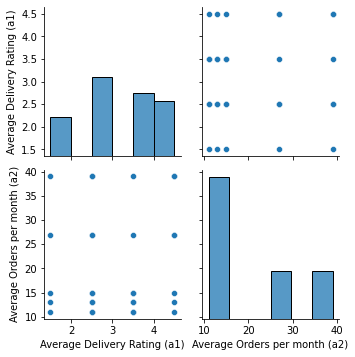

In [9]:
sns.pairplot(delights)
plt.show()

## Step 3: Data Preparation

In [10]:
delights['dmp'] = delights['"Delighted Members" Purchase'] 

In [11]:
varlist = ['dmp']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
delights[varlist] = delights[varlist].apply(binary_map)

In [12]:
delights = delights.drop(columns=['"Delighted Members" Purchase'])

In [13]:
delights.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
0,1.5,11,1
1,2.5,11,0
2,2.5,11,0
3,3.5,11,0
4,3.5,11,0


## Step 4: Splitting the Data into Training and Testing Sets


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
np.random.seed(0)
df_train, df_test = train_test_split(delights, train_size=0.7, random_state=100)

### Using Decision Trees

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dt = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=10, min_samples_split = 10)

In [18]:
df_test.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
9,3.5,13,0
26,2.5,39,1
28,4.5,39,1
13,2.5,15,0
5,4.5,11,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
df_train['Average Delivery Rating (a1)'] = scaler.fit_transform(df_train[['Average Delivery Rating (a1)']])
df_test['Average Delivery Rating (a1)'] = scaler.transform(df_test[['Average Delivery Rating (a1)']])

In [21]:
df_train.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
17,1.000000,15,1
22,1.000000,27,1
11,1.000000,13,0
4,0.666667,11,0
29,1.000000,39,1


In [22]:
df_test.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
9,0.666667,13,0
26,0.333333,39,1
28,1.000000,39,1
13,0.333333,15,0
5,1.000000,11,1


In [23]:
df_train['Average Orders per month (a2)'] = scaler.fit_transform(df_train[['Average Orders per month (a2)']])
df_test['Average Orders per month (a2)'] = scaler.transform(df_test[['Average Orders per month (a2)']])

In [24]:
df_train.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
17,1.000000,0.142857,1
22,1.000000,0.571429,1
11,1.000000,0.071429,0
4,0.666667,0.000000,0
29,1.000000,1.000000,1


In [25]:
df_test.head()

,Average Delivery Rating (a1),Average Orders per month (a2),dmp
9,0.666667,0.071429,0
26,0.333333,1.000000,1
28,1.000000,1.000000,1
13,0.333333,0.142857,0
5,1.000000,0.000000,1


In [26]:
y_train = df_train.pop("dmp")
X_train = df_train

y_test = df_test.pop("dmp")
X_test = df_test

In [27]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [28]:
pip install pydotplus 

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
conda install python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [30]:
import pydotplus, graphviz
from IPython.display import Image

graphviz

<module 'graphviz' from '/opt/conda/lib/python3.9/site-packages/graphviz/__init__.py'>

In [31]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


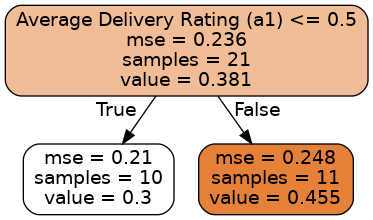

In [34]:
Image(graph.create_png())


In [38]:
from sklearn.metrics import r2_score

In [36]:
y_train_pred = dt.predict(X_train)

In [39]:
r2_score(y_train, y_train_pred)

0.025262237762237794

In [40]:
y_test_pred = dt.predict(X_test)

In [41]:
r2_score(y_test, y_test_pred)

-1.0244687131050765

## using DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=10, min_samples_split = 10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [44]:
!pip install six

In [47]:
X_train

,Average Delivery Rating (a1),Average Orders per month (a2)
17,1.000000,0.142857
22,1.000000,0.571429
11,1.000000,0.071429
4,0.666667,0.000000
29,1.000000,1.000000
0,0.000000,0.000000
1,0.333333,0.000000
18,0.000000,0.571429
14,0.333333,0.142857
19,0.333333,0.571429


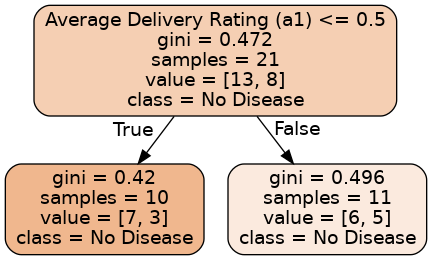

In [46]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())